In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mpgauto/auto.csv


In [2]:
df = pd.read_csv("/kaggle/input/mpgauto/auto.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,U.S,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,U.S,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,U.S,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,U.S,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,U.S,ford torino
...,...,...,...,...,...,...,...,...,...
393,34.0,4,108.0,70.0,2245,16.9,82,other,toyota corolla
394,38.0,4,91.0,67.0,1965,15.0,82,other,honda civic
395,32.0,4,91.0,67.0,1965,15.7,82,other,honda civic (auto)
396,38.0,4,91.0,67.0,1995,16.2,82,other,datsun 310 gx


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [4]:
df.shape

(398, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object

In [8]:
horsepower_mean = df['horsepower'].mean()
df['horsepower'].fillna(horsepower_mean, inplace=True)

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
unique_origins = df['origin'].unique()
print("Unique values in the 'origin' column:", unique_origins)

Unique values in the 'origin' column: ['U.S' 'EU' 'other']


In [11]:
df['origin'] = df['origin'].map({'U.S': 0,'EU': 1,'other': 2})

In [12]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


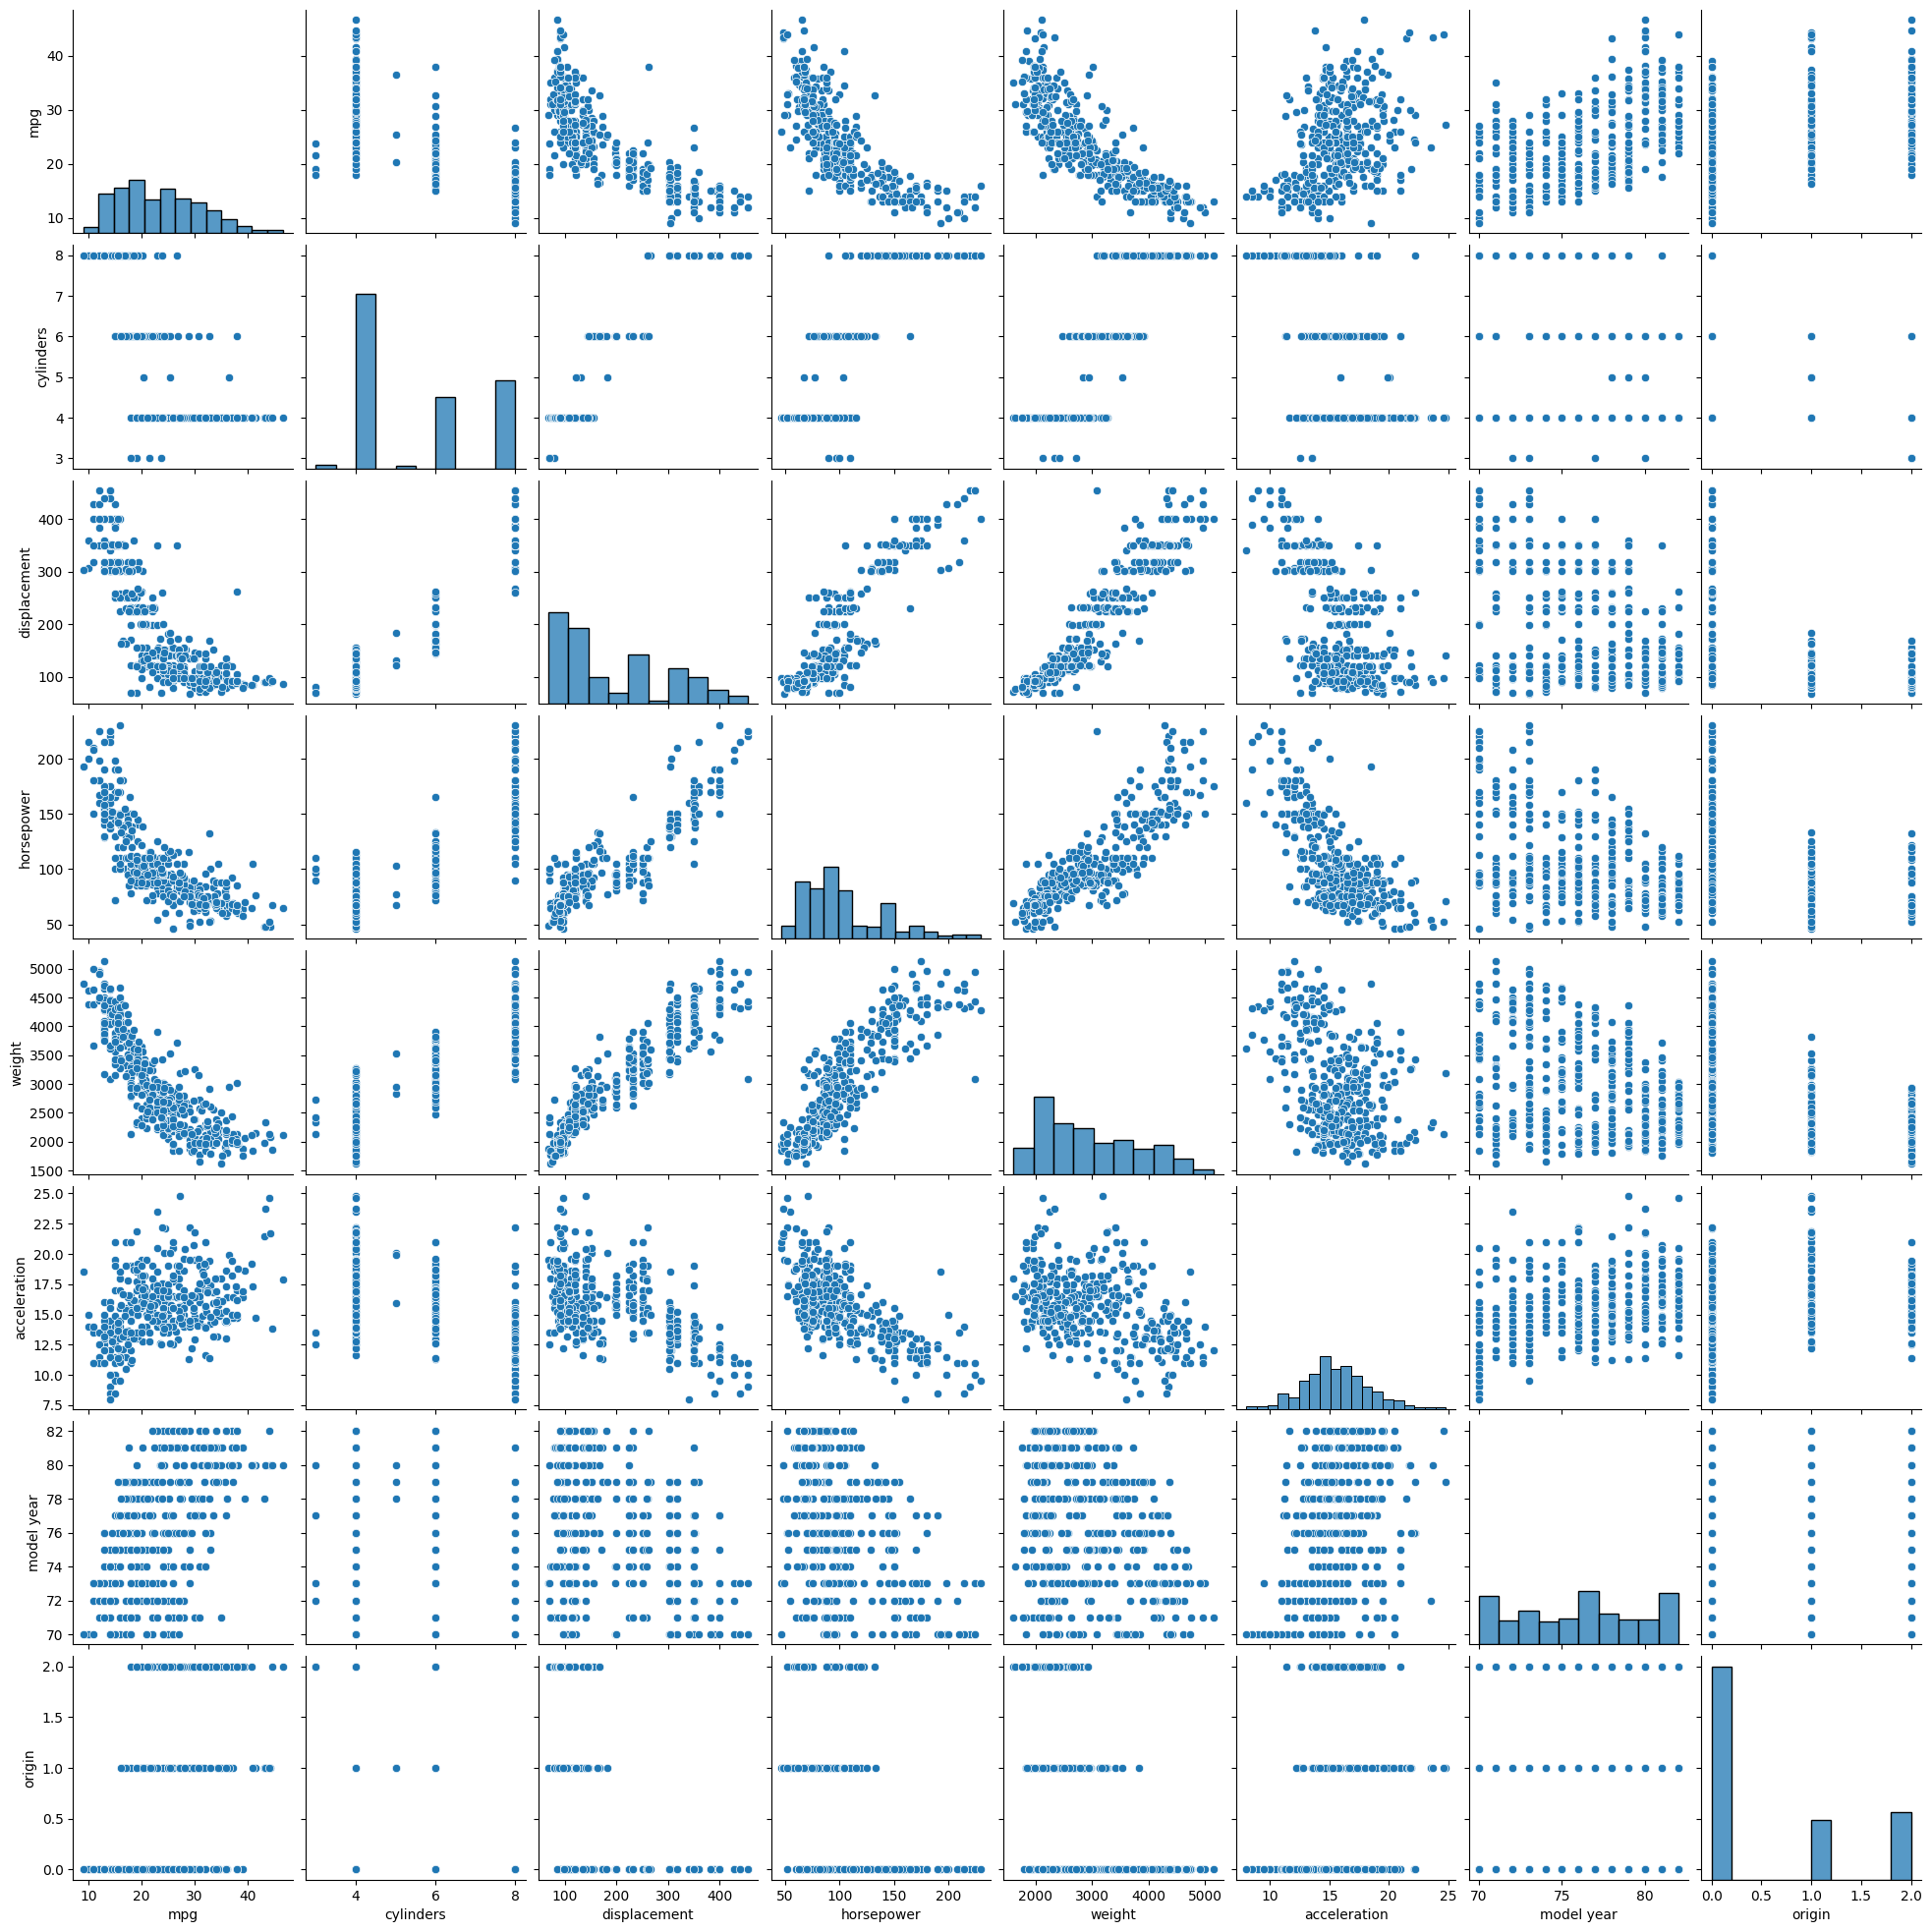

In [13]:
from seaborn import pairplot 
pairplot(df.iloc[:,:8])

<Axes: >

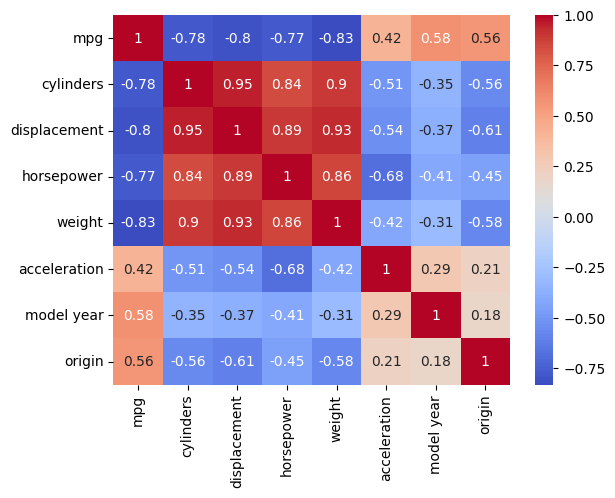

In [14]:
import seaborn as sns
sns.heatmap(df.iloc[:,:8].corr() , annot = True , cmap='coolwarm')

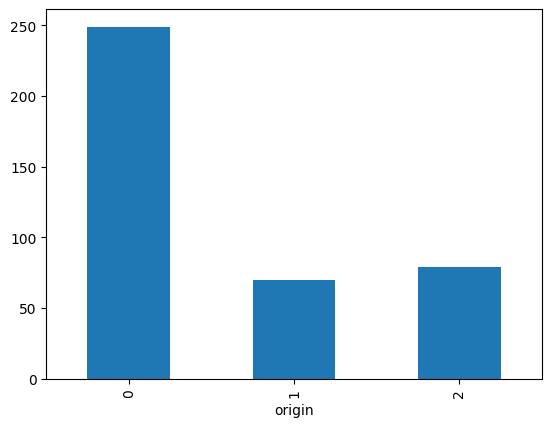

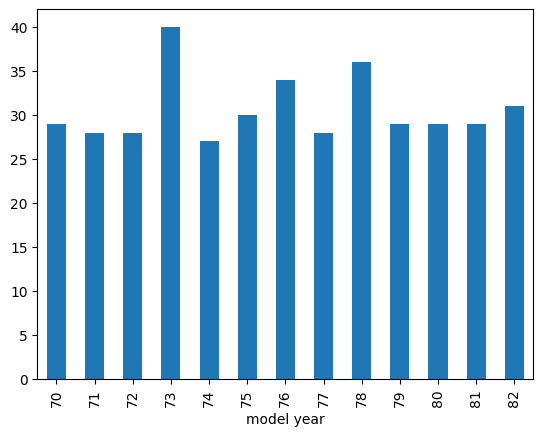

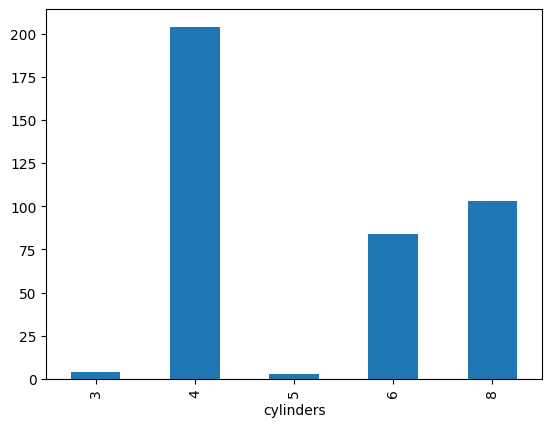

In [15]:
for i in ['origin','model year','cylinders']:
    df[i].value_counts().sort_index().plot.bar()
    plt.show()

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:8], df.iloc[:,0:1], test_size=0.2, random_state=0)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, recall_score, precision_score, f1_score

In [18]:
lr = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

In [19]:
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [20]:
y_pred = best_model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error on Test Set:", rmse)

Best Hyperparameters: {'fit_intercept': True}
Root Mean Squared Error on Test Set: 3.5926591108394668


In [22]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Best Hyperparameters:", best_params)
print("Root Mean Squared Error on Test Set:", rmse)

Best Hyperparameters: {'alpha': 10.0}
Root Mean Squared Error on Test Set: 3.5933155841309423


In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Define the KNN regression KNN_model
KNN_model = KNeighborsRegressor()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Values of k (number of neighbors)
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(KNN_model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best KNN_model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best KNN_model
y_pred = best_model.predict(X_test)

# Evaluate the KNN_model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("Number of Neighbors (k):", grid_search.best_params_['n_neighbors'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)

Best Hyperparameters:
Number of Neighbors (k): 7
Best Mean Squared Error (MSE): 15.843063775510206
Best R-squared (R2): 0.7525215143213624


In [24]:
from sklearn.svm import SVR


model = SVR()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.01, 0.1, 1],  # Epsilon parameter for the epsilon-SVR
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

grid_search.fit(X_train, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("C:", grid_search.best_params_['C'])
print("Epsilon:", grid_search.best_params_['epsilon'])
print("Kernel:", grid_search.best_params_['kernel'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)

Best Hyperparameters:
C: 0.1
Epsilon: 0.1
Kernel: linear
Best Mean Squared Error (MSE): 12.259581367324497
Best R-squared (R2): 0.8084977328356552


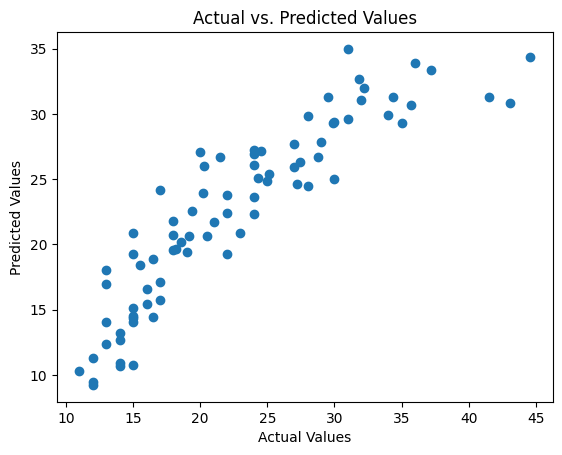

In [25]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

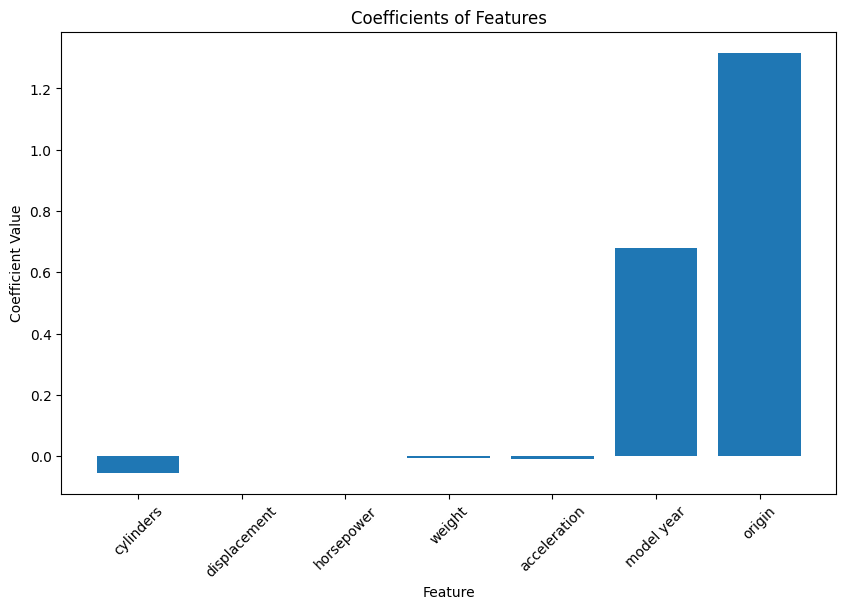

In [26]:
coefficients = best_model.coef_[0]

plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients, align='center')
plt.xticks(range(len(coefficients)), ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'], rotation=45)
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.title('Coefficients of Features')
plt.show()


In [27]:

from sklearn.preprocessing import StandardScaler

# Assuming X_train, y_train, X_test, and y_test are defined

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVR model
model = SVR()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the standardized test data
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("C:", grid_search.best_params_['C'])
print("Epsilon:", grid_search.best_params_['epsilon'])
print("Kernel:", grid_search.best_params_['kernel'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)


Best Hyperparameters:
C: 10
Epsilon: 1
Kernel: rbf
Best Mean Squared Error (MSE): 8.355915932945944
Best R-squared (R2): 0.869475408870096


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, y_train, X_test, and y_test are defined

# Define the Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Define the hyperparameter grid for Grid Search
param_grid = {
    'max_depth': [2, 3, 4, 5],  # Maximum depth of the tree
    'criterion': ['mse', 'friedman_mse', 'poisson']
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # Use X_train directly without scaling

# Get the best Decision Tree model with the optimal hyperparameters
best_dt_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:")
print("Max Depth:", grid_search.best_params_['max_depth'])
print("Criterion:", grid_search.best_params_['criterion'])
print("Best Mean Squared Error (MSE):", mse)
print("Best R-squared (R2):", r2)


Best Hyperparameters:
Max Depth: 4
Criterion: poisson
Best Mean Squared Error (MSE): 14.544465640463255
Best R-squared (R2): 0.7728064228794719


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _valida

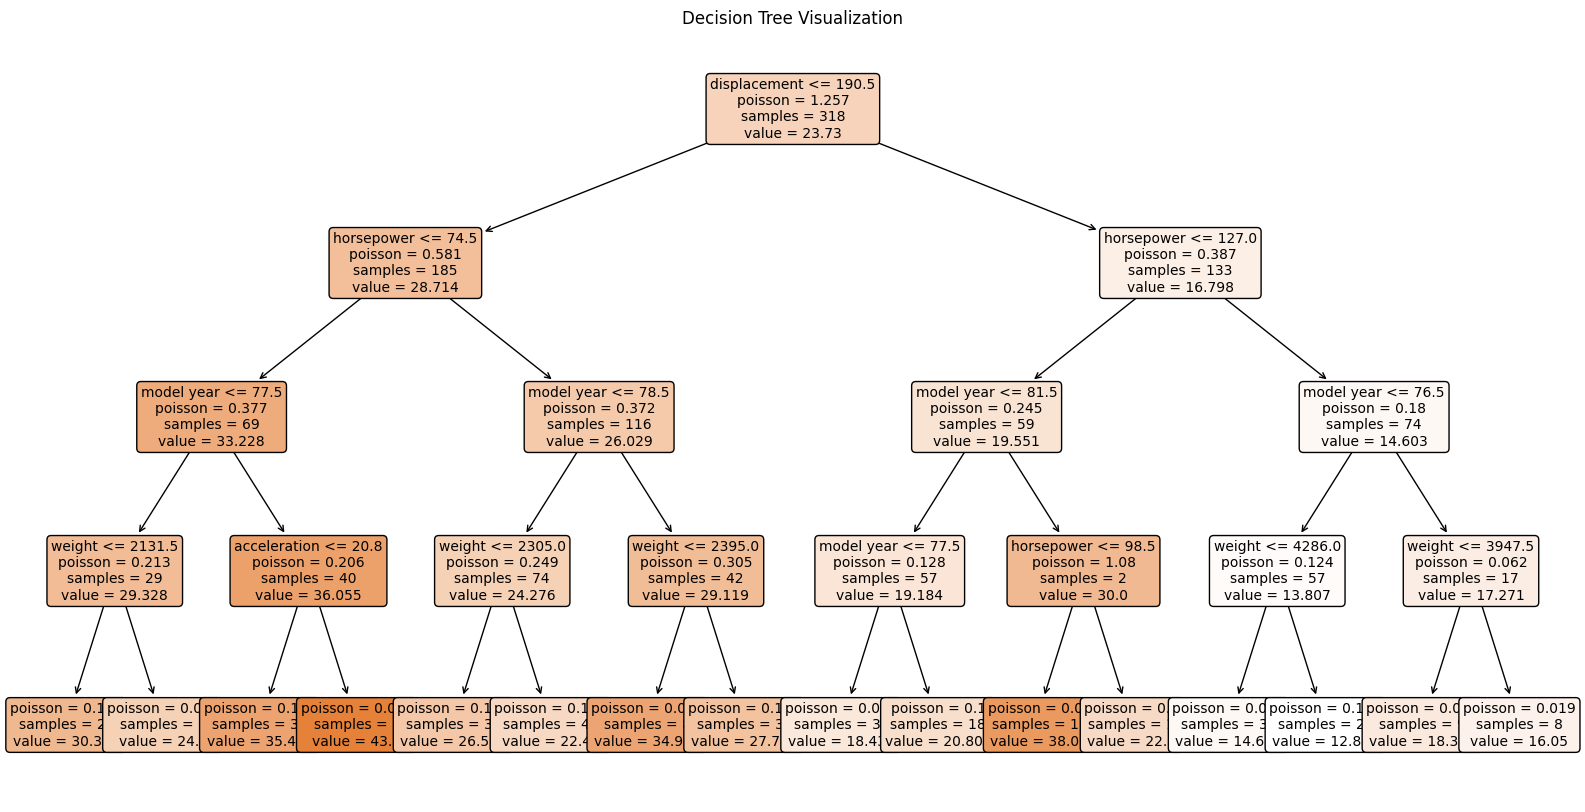

In [29]:
from sklearn.tree import plot_tree

# Visualize the best Decision Tree model
plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin'], rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
